# Step 0. Parameter Setting 

In [1]:
import dtnmonitor_v2 as dtn

### select network interface ,  [all | <net_interface> ]  ###
## if you don't know the interface name, you can use 'all'
## make sure the interface is correct, error_naming or without network flow will get empty grath
#dtn.interface = 'eth0.1301'
#dtn.interface = 'eth0.2038' 
dtn.interface = 'ens4.2038'
#dtn.interface = 'eth1'

### select graph_mode [0|1] 
#graph_mode=0  # all, 
#graph_mode=1  # 100pt
graph_mode=0  

### input nuttcp server's ip
nuttcp_server="10.250.38.7"


# Step 1. Test network transfer by memory

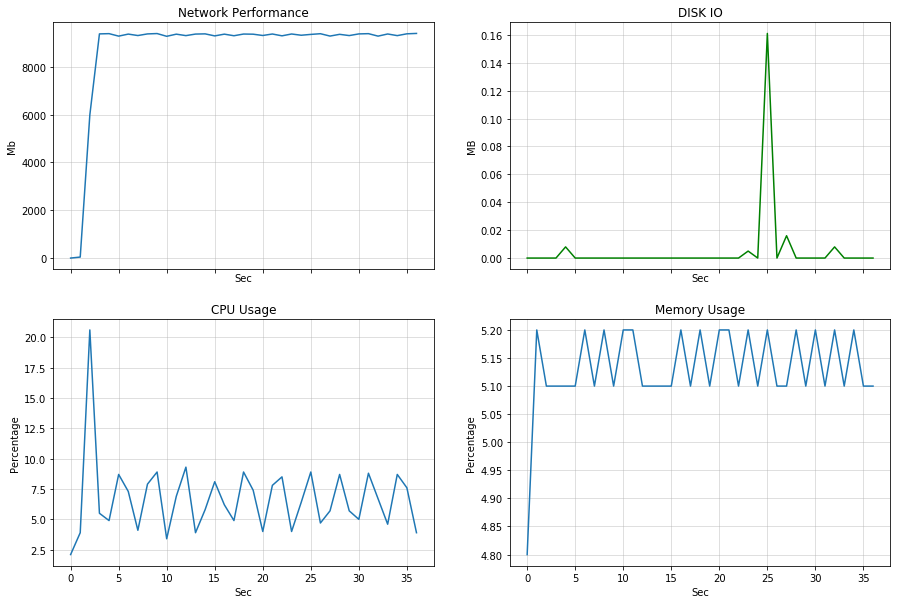

None

In [2]:
dtn.exec_command("/usr/local/bin/nuttcp -t -w110M -i1 -T50s  "+nuttcp_server,graph_mode)


# Step 2. Test network transfer by disk

In [ ]:
filepath="/data/disk0/nuttcp_file"

dtn.exec_command("/usr/local/bin/nuttcp -t -w110M -i1 -T50s -sdz "+nuttcp_server +" >"+filepath,graph_mode)


# Step 3. Test file IO

In [4]:
# fio
# first, filename is assigned with existed and >1GB file path 
randrepeat=" --randrepeat=0" #--randrepeat=0 
bs=" --bs=1M" #--bs=1M 
ioengine=" --ioengine=sync "#--ioengine=sync 
tuntime=" --runtime=30" #--runtime=30 
iodepth=" --iodepth=32"#--iodepth=32 
name=" --name=drive0"#--name=drive0 
size=" --size=100G "#--size=100G 
filename=" --filename=/data/disk0/10G.dat"#--filename=filename

cmd="fio --thread --rw=read --readonly --norandommap --group_reporting --time_based "
command = cmd + randrepeat + bs + ioengine + tuntime + iodepth + name + size + filename
print(command)
#dtn.exec_sysout(command )
dtn.exec_command(command ,graph_mode)


fio --thread --rw=read --readonly --norandommap --group_reporting --time_based  --randrepeat=0 --bs=1M --ioengine=sync  --runtime=30 --iodepth=32 --name=drive0 --size=100G  --filename=/data/disk0/10G.dat


IndexError: tuple index out of range

In [ ]:
dtn.exec_command("python callmonitor_v2.py",graph_mode)